# IMAGE AND VIDEO ANALYTICS
#LAB 2
##NAME: SANTOSHRAM M B
###REGN: 21MIA1137

In [2]:
!apt update
!apt install -y ffmpeg
!pip install ffmpeg-python

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [908 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:14 https

Task 1

In [7]:
import ffmpeg
import os

def extract_and_save_frames(video_path, output_dir, frame_rate=1):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    try:
        (
            ffmpeg
            .input(video_path)
            .filter('fps', fps=frame_rate)
            .output(f'{output_dir}/frame_%04d.png')
            .run(capture_stderr=True, capture_stdout=True)
        )
        print(f"Frames saved in {output_dir}")
    except ffmpeg.Error as e:
        print(f"An error occurred: {e.stderr.decode()}")

video_path = 'planet.mov'
output_dir = 'extracted_frames'
extract_and_save_frames(video_path, output_dir, frame_rate=1)

Frames saved in extracted_frames


Task 2

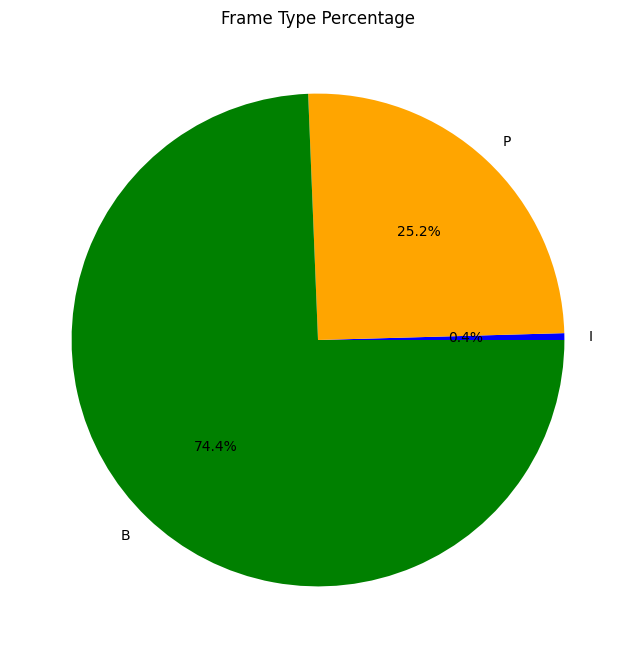

{'I': 0.4439511653718091, 'P': 25.19422863485017, 'B': 74.36182019977802}


In [8]:
import subprocess
import json
import matplotlib.pyplot as plt

def analyze_frame_types(video_path):
    command = ['ffprobe','-v', 'error','-select_streams', 'v:0','-show_entries', 'frame=pict_type','-of', 'json',video_path]
    result = subprocess.run(command, capture_output=True, text=True)
    frames_info = json.loads(result.stdout)
    frame_types = {'I': 0, 'P': 0, 'B': 0}


    for frame in frames_info['frames']:
        if 'pict_type' in frame:
            pict_type = frame['pict_type']
            if pict_type in frame_types:
                frame_types[pict_type] += 1

    total_frames = sum(frame_types.values())
    frame_percentages = {k: (v / total_frames) * 100 for k, v in frame_types.items()}

    return frame_percentages

def plot_pie_chart(frame_percentages):
    frame_labels = list(frame_percentages.keys())
    frame_values = [frame_percentages[frame] for frame in frame_percentages]
    plt.figure(figsize=(8, 8))
    plt.pie(frame_values, labels=frame_labels, autopct='%1.1f%%', colors=['blue', 'orange', 'green'])
    plt.title('Frame Type Percentage')
    plt.show()
video_path = 'planet.mov'
frame_percentages = analyze_frame_types(video_path)
plot_pie_chart(frame_percentages)
print(frame_percentages)

Task 3

In [11]:
import subprocess
import os
def extract_frames(video_path, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # I
    subprocess.run(['ffmpeg', '-i', video_path, '-vf', 'select="eq(pict_type,I)"','-vsync', 'vfr', os.path.join(output_dir, 'I_frame_%04d.png')])
    # P
    subprocess.run(['ffmpeg', '-i', video_path, '-vf', 'select="eq(pict_type,P)"','-vsync', 'vfr', os.path.join(output_dir, 'P_frame_%04d.png')])
    # B
    subprocess.run(['ffmpeg', '-i', video_path, '-vf', 'select="eq(pict_type,B)"','-vsync', 'vfr', os.path.join(output_dir, 'B_frame_%04d.png')])
video_path = 'planet.mov'
output_dir = 'extracted_frames'
extract_frames(video_path, output_dir)

In [12]:
from PIL import Image
import matplotlib.pyplot as plt
import os
def display_frames_with_pillow(directory):
    for frame_type in ['I', 'P', 'B']:
        frame_files = [f for f in os.listdir(directory) if f.startswith(f'{frame_type}_frame_')]
        for frame_file in frame_files:
            img_path = os.path.join(directory, frame_file)
            img = Image.open(img_path)

            plt.figure()
            plt.imshow(img)
            plt.title(f'{frame_type} Frame - {frame_file}')
            plt.axis('off')
            plt.show()
display_frames_with_pillow(output_dir)

In [13]:
import subprocess
import os

def extract_frames(video_path, output_dir, frame_type):

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)


    if frame_type == 'I':
        filter_expr = "select='eq(pict_type,I)'"
        output_pattern = 'I_frame_%04d.png'
    elif frame_type == 'P':
        filter_expr = "select='eq(pict_type,P)'"
        output_pattern = 'P_frame_%04d.png'
    elif frame_type == 'B':
        filter_expr = "select='eq(pict_type,B)'"
        output_pattern = 'B_frame_%04d.png'
    else:
        raise ValueError("Invalid frame type. Choose from 'I', 'P', or 'B'.")

    output_path = os.path.join(output_dir, output_pattern)

    command = [
        'ffmpeg', '-i', video_path, '-vf', filter_expr,'-vsync', 'vfr',output_path]


    try:
        subprocess.run(command, check=True)
        print(f"Frames extracted successfully to {output_dir}")
    except subprocess.CalledProcessError as e:
        print(f"Error extracting frames: {e}")

video_file = 'planet.mov'
output_directory = 'extrac'
extract_frames(video_file, output_directory, 'I')
extract_frames(video_file, output_directory, 'P')
extract_frames(video_file, output_directory, 'B')

Frames extracted successfully to extrac
Frames extracted successfully to extrac
Frames extracted successfully to extrac


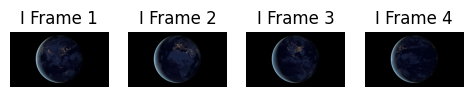

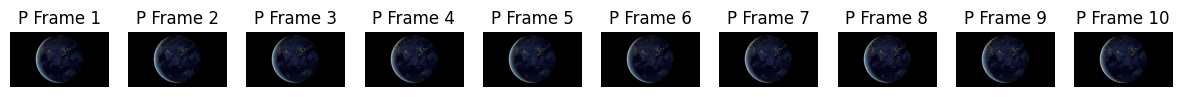

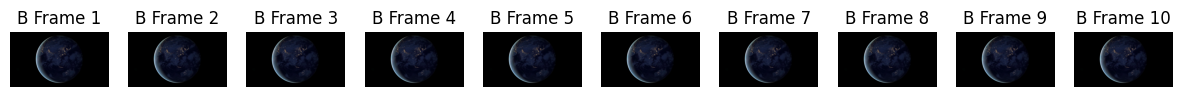

In [14]:
import matplotlib.pyplot as plt
from PIL import Image
import glob

def display_frames(frame_dir, frame_type):
    frame_files = sorted(glob.glob(os.path.join(frame_dir, f'{frame_type}_frame_*.png')))
    if frame_files:
        plt.figure(figsize=(15, 5))
        for i, frame_file in enumerate(frame_files[:10]):
            img = Image.open(frame_file)
            plt.subplot(1, 10, i+1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f'{frame_type} Frame {i+1}')
        plt.show()
    else:
        print(f"No {frame_type} frames found.")
display_frames(output_directory, 'I')
display_frames(output_directory, 'P')
display_frames(output_directory, 'B')

Task 4

In [15]:
import os
import glob
def calculate_frame_sizes(frame_dir, frame_type):
    frame_files = glob.glob(os.path.join(frame_dir, f'{frame_type}_frame_*.png'))
    if not frame_files:
        print(f"No {frame_type} frames found.")
        return 0, 0

    sizes = [os.path.getsize(frame_file) for frame_file in frame_files]
    avg_size = sum(sizes) / len(sizes)
    return avg_size, sizes
output_directory = 'extrac'
avg_size_I, sizes_I = calculate_frame_sizes(output_directory, 'I')
avg_size_P, sizes_P = calculate_frame_sizes(output_directory, 'P')
avg_size_B, sizes_B = calculate_frame_sizes(output_directory, 'B')

print(f"Average size of I frames: {avg_size_I / 1024:.2f} KB")
print(f"Average size of P frames: {avg_size_P / 1024:.2f} KB")
print(f"Average size of B frames: {avg_size_B / 1024:.2f} KB")
print("Sizes of I frames:", sizes_I)
print("Sizes of P frames:", sizes_P)
print("Sizes of B frames:", sizes_B)

Average size of I frames: 304.79 KB
Average size of P frames: 337.29 KB
Average size of B frames: 326.78 KB
Sizes of I frames: [279865, 316293, 330827, 321427]
Sizes of P frames: [394344, 393471, 364174, 358652, 320456, 359154, 364107, 371402, 308824, 298094, 351020, 325314, 362898, 384585, 297604, 351848, 355618, 361803, 395552, 359629, 323528, 359549, 308560, 351237, 358195, 372927, 346631, 381659, 359176, 302737, 295571, 343171, 362968, 350296, 360602, 373914, 392789, 319955, 346672, 396613, 398726, 316306, 380801, 359876, 302985, 398465, 393370, 282314, 334235, 393748, 288356, 358798, 361934, 287214, 284122, 313620, 348850, 398112, 293907, 324382, 360619, 369917, 357767, 363955, 351549, 294159, 318169, 304305, 358724, 389564, 356362, 299535, 389782, 288094, 313681, 388083, 284018, 351580, 325782, 392428, 370255, 376971, 324391, 357079, 366667, 282991, 389939, 312624, 326754, 359650, 356007, 294695, 322687, 299329, 384971, 395228, 377217, 320351, 363998, 284675, 284883, 357082, 3547

Lab Task 5: Advanced Frame **Extraction**

I frames


In [16]:
import subprocess
import os
def extract_i_frames(video_file, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    command = ['ffmpeg','-i', video_file,'-vf', 'select=eq(pict_type\\,I)','-vsync', 'vfr',os.path.join(output_dir, 'i_frame_%04d.png')  ]
    subprocess.run(command, check=True)
extract_i_frames('planet.mov', 'i_frames')

In [17]:
import subprocess

def create_video_from_i_frames(frame_dir, output_video, frame_rate=15):

    command = ['ffmpeg','-framerate', str(frame_rate),  '-i', os.path.join(frame_dir, 'i_frame_%04d.png'),  '-c:v', 'libx264',   '-pix_fmt', 'yuv420p',  output_video   ]
    subprocess.run(command, check=True)

create_video_from_i_frames('i_frames', 'i.mp4')


B frames


In [19]:
import subprocess
import os
def extract_b_frames(video_file, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    command = ['ffmpeg','-i', video_file,'-vf', 'select=eq(pict_type\\,B)','-vsync', 'vfr',os.path.join(output_dir, 'b_frame_%04d.png')  ]
    subprocess.run(command, check=True)
extract_b_frames('planet.mov', 'b_frames')

In [20]:
import subprocess
def create_video_from_p_frames(frame_dir, output_video, frame_rate=20):
    command = ['ffmpeg','-framerate', str(frame_rate),  '-i', os.path.join(frame_dir, 'b_frame_%04d.png'),'-c:v', 'libx264','-pix_fmt', 'yuv420p',output_video]
    subprocess.run(command, check=True)
create_video_from_p_frames('b_frames', 'b.mp4')

P FRAMES


In [22]:
import subprocess
import os
def extract_p_frames(video_file, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    command = ['ffmpeg','-i', video_file,'-vf', 'select=eq(pict_type\\,P)', '-vsync', 'vfr',os.path.join(output_dir, 'p_frame_%04d.png') ]
    subprocess.run(command, check=True)
extract_p_frames('planet.mov', 'p_frames')

In [23]:
import subprocess
def create_video_from_p_frames(frame_dir, output_video, frame_rate=24):
    subprocess.run(['ffmpeg','-framerate', str(frame_rate),  '-i', os.path.join(frame_dir, 'p_frame_%04d.png'),  '-c:v', 'libx264',   '-pix_fmt', 'yuv420p',  output_video   ], check=True)
create_video_from_p_frames('p_frames', 'p.mp4')